# Energy consumption of the Netherlands

## Electricity and Gas consumed in the Netherlands every year

## Description

## Context
### Enexis, Liander, and Stedin are the three major network administrators of the Netherlands and, together, they provide energy to nearly the entire country. Every year, they release on their websites a table with the energy consumption of the areas under their administration.

### The data are anonymized by aggregating the Zipcodes so that every entry describes at least 10 connections.

### This market is not competitive, meaning that the zones are assigned. This means that every year they roughly provide energy to the same zipcodes. Small changes can happen from year to year either for a change of management or for a different aggregation of zipcodes.

## Content
### Every file contains information about groups of zipcodes managed by one of the three companies for a specific year.

## Acknowledgements
### All the data are taken from the following websites:

### https://www.enexis.nl/over-ons/wat-bieden-we/andere-diensten/open-data
### https://www.liander.nl/partners/datadiensten/open-data/data
### https://www.stedin.net/zakelijk/open-data/verbruiksgegevens
### Some processing was made with the code available at: https://github.com/lucabasa/kaggle_dutch_energy/blob/master/raw_data_cleaning.ipynb

### The translation of the column names and descriptions was made by a non-native speaker.

## Inspiration

### How are the smart meters spreading?

### What is the trend of home-produced energy? (solar panel)

### Can we see if there are many electric cars in a neighborhood?

### What is going to be the energy consumption the next year?

# Pre Processing

## EXTRACTION TRANSFORM LOAD, ETL

## ETL: Extraction

### Extracting data of both electricity and gas for each company.

### Energy Company ENEXIS data (Electricity)

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_d677618706764068bebe9e144db03560 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JgVr3TfkAXS1NLjS9FZfKSwmZJo67UYeoTiYEkab9p8t',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df10 = pd.read_csv(body)
df10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,NaN,NaN,4282,25,0.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,NaN,NaN,5113,10,0.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,30,100,NaN,NaN,4809,34,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,NaN,NaN,5015,44,0.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,NaN,NaN,3074,22,0.0


In [2]:
df10.shape

(107512, 14)

In [3]:
# Too see full dataframe...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [4]:
!pip install pixiedust

Requirement not upgraded as not directly required: pixiedust in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: colour in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: markdown in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: astunparse in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: mpld3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: lxml in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pixiedust)
Requirement not upgraded as not directly required: geojson in /o

In [5]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df11 = pd.read_csv(body)
df11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,50,1X25,4961,34,0.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,64,1X25,4517,13,0.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,30,100,43,3X25,3675,31,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,52,1X25,5249,48,0.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,33,1X25,3226,33,0.0


In [6]:
df11.shape

(108299, 14)

In [7]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df12 = pd.read_csv(body)
df12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,50,1X25,5369,37,0.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,64,1X25,4344,14,0.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3X25,4492,35,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,52,1X25,5559,47,5.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,38,1X25,3110,32,0.0


In [8]:
df12.shape

(109808, 14)

In [9]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df13 = pd.read_csv(body)
df13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,50,1X25,4597,31,0.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,64,1X25,3953,13,0.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3X25,4449,33,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,52,1X25,5532,47,5.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,38,1X25,2969,31,0.0


In [10]:
df13.shape

(113248, 14)

In [11]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df14 = pd.read_csv(body)
df14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,50,1X25,4589,18,0.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,64,1X25,4124,16,0.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3X25,4180,23,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,52,1X25,5231,36,10.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,38,1X25,3166,23,0.0


In [12]:
df14.shape

(113644, 14)

In [13]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df15 = pd.read_csv(body)
df15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,50,1X25,4716,27,6.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,82,11,100,64,1X25,4547,17,18.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3X25,4060,24,0.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,95,20,100,45,1X25,4921,51,15.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,33,1X25,3185,19,8.0


In [14]:
df15.shape

(113989, 14)

In [15]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df16 = pd.read_csv(body)
df16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,15,100,47,1x25,4728,29,7.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,80,10,100,60,1x25,3908,33,20.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3x25,3850,30,14.0
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,95,21,100,48,1x25,4751,52,14.0
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,38,1x25,3084,31,23.0


In [16]:
df16.shape

(110577, 14)

In [17]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df17 = pd.read_csv(body)
df17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,100,42,100,50,3X25,5863,27,5.0
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,44,1X25,4946,30,13.0
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,82,11,100,64,1X25,2892,29,27.0
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,29,100,41,3X25,3868,33,17.0
4,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,90,21,100,43,1X25,4802,59,33.0


In [18]:
df17.shape

(115576, 14)

In [19]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df18 = pd.read_csv(body)
df18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,42,100.00,100,50,3x25,5860.21,28.31,7.14
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,17,100.00,100,"41,18",1x25,4149.24,28.33,29.41
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,11,81.82,100,"63,64",1x25,2389.27,34.60,36.36
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,29,100.00,100,"41,38",3x25,3866.21,32.11,17.24
4,Enexis B.V.,ENEXIS,Heuveltje,4251AE,4251AG,WERKENDAM,21,90.48,100,"42,86",1x25,4416.52,57.26,33.33


In [20]:
df18.shape

(124163, 14)

### Energy Company LIANDER data (Electricity)

In [21]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_09 = pd.read_csv(body)
df_09.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15,100.0,66.67,47,3x25,12958,46.67,0.0
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,23,100.0,78.26,43,3x25,14761,39.13,0.0
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31,100.0,77.42,58,3x25,12139,16.13,0.0
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,66.67,52,3x25,5082,47.62,0.0
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15,100.0,60.00,93,3x25,3712,33.33,0.0


In [22]:
df_09.shape

(132655, 14)

In [23]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_10 = pd.read_csv(body)
df_10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15,100.0,73.33,47,3x25,11420,46.67,0.0
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,24,100.0,79.17,50,3x25,15289,37.50,0.0
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,31,100.0,77.42,58,3x25,12576,16.13,0.0
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,38.10,52,3x25,4395,47.62,0.0
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,15,100.0,40.00,80,3x25,3373,33.33,0.0


In [24]:
df_10.shape

(133554, 14)

In [25]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_11 = pd.read_csv(body)
df_11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,16,100.0,68.75,44,3x25,8565,50.00,0.0
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,24,100.0,75.00,33,3x25,15694,37.50,0.0
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,33,100.0,72.73,30,3x25,11739,15.15,0.0
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,33.33,57,3x25,4557,47.62,0.0
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,68,3x25,3231,26.32,0.0


In [26]:
df_11.shape

(134371, 14)

In [27]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_12 = pd.read_csv(body)
df_12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,17,100.0,64.71,29,3x25,8545,23.53,0.0
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,25,100.0,68.00,28,3x25,14592,20.00,0.0
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,33,100.0,69.70,30,3x25,11278,12.12,0.0
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,23.81,57,3x25,4270,38.10,0.0
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,68,3x25,3232,26.32,0.0


In [28]:
df_12.shape

(135181, 14)

In [29]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_13 = pd.read_csv(body)
df_13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,17,100.0,64.71,29,OBK,9064,23.53,0.00
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AB,1011AB,AMSTERDAM,25,100.0,68.00,28,3x25,14981,16.00,0.00
2,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,33,100.0,66.67,30,3x25,11210,15.15,3.03
3,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,21,100.0,23.81,57,3x25,3859,38.10,0.00
4,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,68,3x25,2989,26.32,0.00


In [30]:
df_13.shape

(136040, 14)

In [31]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_14 = pd.read_csv(body)
df_14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AB,NIEUW VENNEP,31,100.0,48.39,29,3x25,16245,38.71,16.13
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,32,100.0,65.63,31,3x25,11433,28.13,15.63
2,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,20,100.0,5.00,60,3x25,3665,45.00,0.00
3,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,18,100.0,33.33,67,3x25,3117,33.33,5.56
4,Liander N.V. (NW),Liander NW,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,12,100.0,91.67,50,3x25,20056,58.33,25.00


In [32]:
df_14.shape

(135737, 14)

In [33]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_15 = pd.read_csv(body)
df_15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,32,100.0,50.00,28,3x25,16049,37.50,18.75
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,34,100.0,64.71,32,3x25,12300,26.47,17.65
2,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,19,100.0,5.26,58,3x25,3858,47.37,0.00
3,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,68,3x25,2739,31.58,5.26
4,Liander N.V. (NW),Liander NW,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,12,100.0,91.67,50,3x25,20770,58.33,25.00


In [34]:
df_15.shape

(136238, 14)

In [35]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_16 = pd.read_csv(body)
df_16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,33,100.0,51.52,27,3x25,13791,39.39,21.21
1,Liander N.V. (NW),Liander NW,De Ruyterkade,1011AC,1011AC,AMSTERDAM,37,100.0,64.86,32,3x25,11604,32.43,24.32
2,Liander N.V. (NW),Liander NW,Oosterdokskade,1011AD,1011AD,AMSTERDAM,19,100.0,5.26,58,3x25,4026,47.37,0.00
3,Liander N.V. (NW),Liander NW,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,63,3x25,2845,31.58,5.26
4,Liander N.V. (NW),Liander NW,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,13,100.0,92.31,31,1x35,18753,53.85,30.77


In [36]:
df_16.shape

(140639, 14)

In [37]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_17 = pd.read_csv(body)
df_17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),NaN,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,34,100.0,47.06,29,3x25,13601,41.18,20.59
1,Liander N.V. (NW),NaN,De Ruyterkade,1011AC,1011AC,AMSTERDAM,38,100.0,57.89,34,3x25,14672,36.84,26.32
2,Liander N.V. (NW),NaN,Oosterdokskade,1011AD,1011AD,AMSTERDAM,19,100.0,5.26,58,3x25,4026,47.37,0.00
3,Liander N.V. (NW),NaN,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,36.84,63,3x25,3239,31.58,5.26
4,Liander N.V. (NW),NaN,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,14,100.0,92.86,29,1x35,19220,50.00,35.71


In [38]:
df_17.shape

(141484, 14)

In [39]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_18 = pd.read_csv(body)
df_18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),NaN,De Ruyterkade Steigers,1011AA,1011AB,AMSTERDAM,35,100.0,34.29,31,3x25,14403,40.00,22.86
1,Liander N.V. (NW),NaN,De Ruyterkade,1011AC,1011AC,AMSTERDAM,39,100.0,56.41,28,3x80,18739,41.03,28.21
2,Liander N.V. (NW),NaN,Oosterdokskade,1011AD,1011AD,AMSTERDAM,19,100.0,5.26,58,3x25,4026,47.37,0.00
3,Liander N.V. (NW),NaN,Oosterdokskade AB,1011AE,1011AE,AMSTERDAM,19,100.0,10.53,63,3x25,3184,31.58,5.26
4,Liander N.V. (NW),NaN,Prins Hendrikkade,1011AG,1011AG,AMSTERDAM,14,100.0,92.86,29,1x35,20376,50.00,35.71


In [40]:
df_18.shape

(142265, 14)

### Energy Company STEDIN Data (Electricity)

In [41]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st09 = pd.read_csv(body)
df_st09.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.0,100.00,41,1x25,3467,76.47,0.0
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.0,100.00,41,3x25,3880,64.71,0.0
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.0,100.00,45,1x25,4699,85.00,0.0
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.0,100.00,71,1x25,4039,64.71,0.0


In [42]:
df_st09.shape

(81514, 14)

In [43]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st10 = pd.read_csv(body)
df_st10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.0,100.00,41,1x25,3467,76.47,0.0
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.0,100.00,41,3x25,3880,64.71,0.0
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.0,100.00,45,1x25,4699,85.00,0.0
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.0,100.00,71,1x25,4039,64.71,0.0


In [44]:
df_st10.shape

(82074, 14)

In [45]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st11 = pd.read_csv(body)
df_st11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.0,100.00,41,1x25,3467,76.47,0.0
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.0,100.00,41,1x25,3880,64.71,0.0
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.0,100.00,45,1x25,4699,85.00,0.0
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.0,100.00,71,1x25,4039,64.71,0.0


In [46]:
df_st11.shape

(82549, 14)

In [47]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st12 = pd.read_csv(body)
df_st12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.0,100.00,41,1x25,3467,76.47,0.0
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.0,100.00,41,3x25,3880,64.71,0.0
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.0,100.00,45,1x25,4699,85.00,0.0
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.0,100.00,71,1x25,4039,64.71,0.0


In [48]:
df_st12.shape

(83000, 14)

In [49]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st13 = pd.read_csv(body)
df_st13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5933,81.25,0.0
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.0,100.00,41,1x25,3246,76.47,0.0
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.0,100.00,41,1x25,3880,64.71,0.0
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.0,100.00,45,1x25,4675,85.00,0.0
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.0,100.00,71,1x25,3907,64.71,0.0


In [50]:
df_st13.shape

(82687, 14)

In [51]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st14 = pd.read_csv(body)
df_st14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,96.97,93.94,79,3x25,6359,81.82,3.03
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41,1x25,3364,76.47,0.00
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47,3x25,3914,70.59,0.00
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45,1x25,4430,85.00,0.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.00,100.00,71,1x25,4020,64.71,0.00


In [52]:
df_st14.shape

(83004, 14)

In [53]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st15 = pd.read_csv(body)
df_st15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,96.97,93.94,79,3x25,5527,81.82,9.09
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41,1x25,3295,76.47,0.00
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47,3x25,3852,70.59,0.00
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45,1x25,4218,85.00,0.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.00,100.00,71,1x25,3781,64.71,0.00


In [54]:
df_st15.shape

(83388, 14)

In [55]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st16 = pd.read_csv(body)
df_st16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,96.97,93.94,79,3x25,5223,81.82,9.09
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41,1x25,3169,76.47,11.76
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47,3x25,3819,70.59,5.88
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45,3x25,4527,85.00,15.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.00,100.00,71,1x25,3601,64.71,0.00


In [56]:
df_st16.shape

(83791, 14)

In [57]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st17 = pd.read_csv(body)
df_st17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,96.97,90.91,79,3x25,5203,81.82,9.09
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41,1x25,3181,76.47,17.65
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47,3x25,3717,76.47,5.88
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45,3x25,4644,85.00,15.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,100.00,100.00,71,1x25,3526,64.71,0.00


In [58]:
df_st17.shape

(84190, 14)

In [59]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st18 = pd.read_csv(body)
df_st18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,93.94,90.91,"76,00",3x25,5926,84.85,21.21
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,"41,00",1x25,3149,76.47,17.65
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,"47,00",3x25,3906,76.47,5.88
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,"45,00",3x25,4696,85.00,15.00
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,94.12,100.00,"71,00",1x25,3557,64.71,5.88


In [60]:
df_st18.shape

(84695, 14)

### Energy Company ENEXIS Data (Gas)

In [61]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_10 = pd.read_csv(body)
df_exisgas_10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AC,4611AD,BERGEN OP ZOOM,100,17,100,NaN,NaN,496,0,NaN
1,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AE,4611AE,BERGEN OP ZOOM,100,11,100,NaN,NaN,355,0,NaN
2,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AG,4611AJ,BERGEN OP ZOOM,100,24,100,NaN,NaN,3074,0,NaN
3,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AK,4611AK,BERGEN OP ZOOM,100,14,100,NaN,NaN,13456,0,NaN
4,Enexis B.V.,ENEXIS,Zuid - Oostsingel,4611AL,4611BA,BERGEN OP ZOOM,100,23,100,NaN,NaN,10096,0,NaN


In [62]:
df_exisgas_10.shape

(82966, 14)

In [63]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_11 = pd.read_csv(body)
df_exisgas_11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AB,4611AB,BERGEN OP ZOOM,100,15,100,80,G4,3215,0,NaN
1,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AC,4611AD,BERGEN OP ZOOM,100,17,100,100,G4,489,0,NaN
2,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AE,4611AE,BERGEN OP ZOOM,100,11,100,91,G4,346,0,NaN
3,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AG,4611AG,BERGEN OP ZOOM,100,10,100,50,G4,2910,0,NaN
4,Enexis B.V.,ENEXIS,Antwerpsestraat,4611AH,4611AJ,BERGEN OP ZOOM,100,18,100,56,G4,2703,0,NaN


In [64]:
df_exisgas_11.shape

(83518, 14)

In [65]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_12 = pd.read_csv(body)
df_exisgas_12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,94,G4,2372,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,10,100,100,G4,2190,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,2224,0,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,86,G4,2463,0,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,92,G4,1232,0,NaN


In [66]:
df_exisgas_12.shape

(91509, 14)

In [67]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_13 = pd.read_csv(body)
df_exisgas_13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,94,G4,2372,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,10,100,100,G4,2190,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,2224,0,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,86,G4,2463,0,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,92,G4,1232,0,NaN


In [68]:
df_exisgas_13.shape

(94423, 14)

In [69]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_14 = pd.read_csv(body)
df_exisgas_14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,94,G4,2298,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,10,100,100,G4,2099,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,2188,0,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,86,G4,2342,0,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,92,G4,1241,0,NaN


In [70]:
df_exisgas_14.shape

(94689, 14)

In [71]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_15 = pd.read_csv(body)
df_exisgas_15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,94,G4,2159,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,10,100,100,G4,1979,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,2051,0,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,20,100,85,G4,2421,0,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,92,G4,1239,0,NaN


In [72]:
df_exisgas_15.shape

(94945, 14)

In [73]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_16 = pd.read_csv(body)
df_exisgas_16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,15,100,93,G4,2138,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,10,100,100,G4,1891,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,1975,0,NaN
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,86,G4,2357,0,NaN
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,13,100,92,G4,1225,0,NaN


In [74]:
df_exisgas_16.shape

(84429, 14)

In [75]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_17 = pd.read_csv(body)
df_exisgas_17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,100,40,100,78,G4,1972,0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,15,100,93,G4,2082,0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,100,G4,1872,0,NaN
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,22,100,86,G4,1858,0,NaN
4,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,86,G4,2370,0,NaN


In [76]:
df_exisgas_17.shape

(102661, 14)

In [77]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_gas_01012018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_exisgas_18 = pd.read_csv(body)
df_exisgas_18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,40,100.0,100,"77,50",G4,1862.95,0.0,NaN
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,16,100.0,100,"93,75",G4,2066.19,0.0,NaN
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,11,100.0,100,100,G4,1606.73,0.0,NaN
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,22,100.0,100,"86,36",G4,1876.14,0.0,NaN
4,Enexis B.V.,ENEXIS,Heuveltje,4251AE,4251AG,WERKENDAM,21,100.0,100,"85,71",G4,2180.38,0.0,NaN


In [78]:
df_exisgas_18.shape

(110407, 14)

### Energy Company LIANDER Data (Gas)

In [79]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_09 = pd.read_csv(body)
df_liandergas_09.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,21,100.0,90.48,43,G4,6052,0.0,0.0
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AH,AMSTERDAM,35,100.0,94.29,89,G4,1933,0.0,0.0
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,60,G4,1523,0.0,0.0
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,25,100.0,96.00,88,G4,2103,0.0,0.0
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AP,1011AP,AMSTERDAM,18,100.0,100.00,89,G4,2679,0.0,0.0


In [80]:
df_liandergas_09.shape

(100839, 14)

In [81]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_10 = pd.read_csv(body)
df_liandergas_10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,21,100.0,85.71,43,G4,6728,0.0,0.0
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AH,AMSTERDAM,35,100.0,91.43,89,G4,1822,0.0,0.0
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,60,G4,1556,0.0,0.0
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,25,100.0,96.00,88,G4,2006,0.0,0.0
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AP,1011AP,AMSTERDAM,18,100.0,100.00,89,G4,2774,0.0,0.0


In [82]:
df_liandergas_10.shape

(101398, 14)

In [83]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_11 = pd.read_csv(body)
df_liandergas_11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,77.27,45,G4,3849,0.0,0.0
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,63.64,82,G4,1231,0.0,0.0
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,93,G4,2075,0.0,0.0
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,60,G4,1496,0.0,0.0
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,27,100.0,88.89,89,G4,2004,0.0,0.0


In [84]:
df_liandergas_11.shape

(104509, 14)

In [85]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_12 = pd.read_csv(body)
df_liandergas_12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,81.82,41,G4,3517,0.0,0.0
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,1274,0.0,0.0
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,93,G4,3179,0.0,0.0
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,60,G4,1997,0.0,0.0
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,27,100.0,96.30,89,G4,2050,0.0,0.0


In [86]:
df_liandergas_12.shape

(104936, 14)

In [87]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_13 = pd.read_csv(body)
df_liandergas_13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,81.82,41,G4,3893,0.0,4.55
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,1279,0.0,0.00
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,93,G4,2869,0.0,7.41
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,86.67,67,G4,1770,0.0,0.00
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,27,100.0,96.30,89,G4,2218,0.0,0.00


In [88]:
df_liandergas_13.shape

(105332, 14)

In [89]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_14 = pd.read_csv(body)
df_liandergas_14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,81.82,41,G4,3938,0.0,18.18
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,1248,0.0,9.09
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,96,G4,2199,0.0,14.81
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,73,G4,1722,0.0,33.33
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,28,100.0,96.43,86,G4,2662,0.0,50.00


In [90]:
df_liandergas_14.shape

(105671, 14)

In [91]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_15 = pd.read_csv(body)
df_liandergas_15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,72.73,41,G4,4329,0.0,22.73
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,1082,0.0,9.09
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,96,G4,2137,0.0,14.81
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,73,G4,1793,0.0,33.33
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,28,100.0,96.43,86,G4,2088,0.0,53.57


In [92]:
df_liandergas_15.shape

(106015, 14)

In [93]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_16 = pd.read_csv(body)
df_liandergas_16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,GAS Gastransport Services (GASUNIE),De Ruyterkade,1011AC,1011AC,AMSTERDAM,22,100.0,72.73,41,G4,5611,0.0,22.73
1,GAS Liander,GAS Gastransport Services (GASUNIE),Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,876,0.0,9.09
2,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,96,G4,2227,0.0,18.52
3,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,15,100.0,93.33,73,G4,1664,0.0,40.00
4,GAS Liander,GAS Gastransport Services (GASUNIE),Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,29,100.0,93.10,83,G4,2394,0.0,55.17


In [94]:
df_liandergas_16.shape

(117250, 14)

In [95]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_17 = pd.read_csv(body)
df_liandergas_17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,NaN,De Ruyterkade,1011AC,1011AC,AMSTERDAM,23,100.0,73.91,39,G6,5227,0.0,26.09
1,GAS Liander,NaN,Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,45.45,82,G4,1131,0.0,9.09
2,GAS Liander,NaN,Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,96,G4,2528,0.0,22.22
3,GAS Liander,NaN,Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,16,100.0,93.75,75,G4,1508,0.0,43.75
4,GAS Liander,NaN,Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,29,100.0,93.10,83,G4,2263,0.0,58.62


In [96]:
df_liandergas_17.shape

(117735, 14)

In [97]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_gas_01012018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_18 = pd.read_csv(body)
df_liandergas_18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,GAS Liander,NaN,De Ruyterkade,1011AC,1011AC,AMSTERDAM,24,100.0,75.00,38,G6,6589,0.0,29.17
1,GAS Liander,NaN,Oosterdokskade,1011AD,1011AE,AMSTERDAM,11,100.0,9.09,82,G4,710,0.0,9.09
2,GAS Liander,NaN,Prins Hendrikkade,1011AG,1011AH,AMSTERDAM,27,100.0,100.00,96,G4,2756,0.0,22.22
3,GAS Liander,NaN,Prins Hendrikkade,1011AJ,1011AJ,AMSTERDAM,16,100.0,93.75,69,G4,1600,0.0,43.75
4,GAS Liander,NaN,Prins Hendrikkade,1011AM,1011AN,AMSTERDAM,29,100.0,93.10,83,G4,2171,0.0,58.62


In [98]:
df_liandergas_18.shape

(118199, 14)

### Energy Company STEDIN Data (Gas)

In [99]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_09 = pd.read_csv(body)
df_stgas_09.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892700004,Duivendrecht,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,26,100.0,100.0,92,G4,2611,0.0,0.0
1,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,26,100.0,100.0,92,G4,2993,0.0,0.0
2,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,20,100.0,95.0,75,G4,5400,0.0,0.0
3,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.0,64,G4,5393,0.0,0.0
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.0,100,G4,2128,0.0,0.0


In [100]:
df_stgas_09.shape

(83875, 14)

In [101]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_10 = pd.read_csv(body)
df_stgas_10.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892700004,Duivendrecht,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,26,100.0,100.0,92,G4,2611,0.0,0.0
1,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,26,100.0,100.0,92,G4,2993,0.0,0.0
2,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,20,100.0,95.0,75,G4,5400,0.0,0.0
3,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.0,64,G4,5393,0.0,0.0
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.0,100,G4,2128,0.0,0.0


In [102]:
df_stgas_10.shape

(84225, 14)

In [103]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2011.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_11 = pd.read_csv(body)
df_stgas_11.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892700004,Duivendrecht,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.3,90,G4,2583,0.0,0.0
1,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,100.0,90,G4,2993,0.0,0.0
2,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,20,100.0,95.0,75,G4,5400,0.0,0.0
3,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.0,64,G4,5393,0.0,0.0
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.0,100,G4,2128,0.0,0.0


In [104]:
df_stgas_11.shape

(84533, 14)

In [105]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2012.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_12 = pd.read_csv(body)
df_stgas_12.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892700004,Duivendrecht,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.3,90,G4,2583,0.0,0.0
1,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,100.0,90,G4,2993,0.0,0.0
2,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,20,100.0,95.0,75,G4,5400,0.0,0.0
3,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.0,64,G4,5393,0.0,0.0
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.0,100,G4,2128,0.0,0.0


In [106]:
df_stgas_12.shape

(84869, 14)

In [107]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2013.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_13 = pd.read_csv(body)
df_stgas_13.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.67,90,G4,2603,0.0,0.0
1,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,21,100.0,90.48,71,G4,4586,0.0,0.0
2,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.00,64,G4,4730,0.0,0.0
3,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.00,100,G4,1956,0.0,0.0
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AJ,1115AJ,DUIVENDRECHT,20,100.0,90.00,95,G4,2418,0.0,0.0


In [108]:
df_stgas_13.shape

(85083, 14)

In [109]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2014.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_14 = pd.read_csv(body)
df_stgas_14.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.67,90,G4,2428,0.0,6.67
1,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,21,100.0,95.24,71,G4,4642,0.0,0.00
2,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,22,100.0,100.00,64,G4,4582,0.0,0.00
3,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.00,100,G4,2043,0.0,0.00
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AJ,1115AJ,DUIVENDRECHT,20,100.0,85.00,95,G4,2454,0.0,0.00


In [110]:
df_stgas_14.shape

(85313, 14)

In [111]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2015.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_15 = pd.read_csv(body)
df_stgas_15.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.67,93,G4,2394,0.0,6.67
1,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,21,100.0,90.48,71,G4,4111,0.0,0.00
2,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AG,DUIVENDRECHT,23,100.0,91.30,65,G4,4395,0.0,0.00
3,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.00,100,G4,1906,0.0,0.00
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AJ,1115AJ,DUIVENDRECHT,20,100.0,95.00,95,G4,2068,0.0,0.00


In [112]:
df_stgas_15.shape

(85573, 14)

In [113]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_16 = pd.read_csv(body)
df_stgas_16.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.67,93,G4,2331,0.0,10.00
1,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,21,100.0,90.48,71,G4,3596,0.0,4.76
2,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AD,DUIVENDRECHT,10,100.0,90.00,40,G6,4728,0.0,0.00
3,8716892700004,Duivendrecht,Industrieweg,1115AE,1115AG,DUIVENDRECHT,14,100.0,92.86,86,G4,2160,0.0,0.00
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.00,100,G4,1720,0.0,9.09


In [114]:
df_stgas_16.shape

(85904, 14)

In [115]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_17 = pd.read_csv(body)
df_stgas_17.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,96.67,93,G4,2281,0.0,10.00
1,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,21,100.0,90.48,71,G4,3570,0.0,4.76
2,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AD,DUIVENDRECHT,10,100.0,100.00,40,G6,4981,0.0,0.00
3,8716892700004,Duivendrecht,Industrieweg,1115AE,1115AG,DUIVENDRECHT,14,100.0,92.86,86,G4,2037,0.0,7.14
4,8716892700004,Duivendrecht,Rijksstraatweg,1115AH,1115AH,DUIVENDRECHT,11,100.0,100.00,100,G4,1839,0.0,18.18


In [116]:
df_stgas_17.shape

(86221, 14)

In [117]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_gas_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_18 = pd.read_csv(body)
df_stgas_18.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716892700004,Duivendrecht,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,100.00,"93,00",G4,2267,0.0,14.81
1,8716892720002,Halfweg,Tom Schreursweg,1067MC,1115AB,AMSTERDAM,30,100.0,100.00,"93,00",G4,3225,0.0,0.00
2,8716892700004,Duivendrecht,Molenkade,1115AC,1115AC,DUIVENDRECHT,22,100.0,86.36,"68,00",G4,3525,0.0,4.55
3,8716892700004,Duivendrecht,Industrieweg,1115AD,1115AD,DUIVENDRECHT,10,100.0,100.00,"40,00",G6,7709,0.0,10.00
4,8716892700004,Duivendrecht,Industrieweg,1115AE,1115AG,DUIVENDRECHT,14,100.0,92.86,"86,00",G4,2002,0.0,7.14


In [118]:
df_stgas_18.shape

(85841, 14)

## ETL: Transformation & Load
### We have extracted all the data, now we have to merge all the data into single dataframe. For different operations or purposes, we will make three frames, one for electricty data, the other for gas data and last one comprised of all. May be we didn't use all these frames; it depends on the requirements.

In [119]:
# concatenation for electricity data
elec_frames=[df10,df11,df12,df13,df14,df15,df16,df17,df18, df_09, df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18, \
             df_st09,df_st10, df_st11, df_st12,df_st13,df_st14,df_st15,df_st16,df_st17,df_st18]
electricity=pd.concat (elec_frames, axis=0)
electricity.head(100)

,annual_consume,annual_consume_lowtarif_perc,city,delivery_perc,net_manager,num_connections,perc_of_active_connections,purchase_area,smartmeter_perc,street,type_conn_perc,type_of_connection,zipcode_from,zipcode_to
0,4282.0,25.0,WERKENDAM,100.0,Enexis B.V.,16,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AB,4251AB
1,5113.0,10.0,WERKENDAM,100.0,Enexis B.V.,11,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AC,4251AC
2,4809.0,34.0,WERKENDAM,100.0,Enexis B.V.,30,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AD,4251AD
3,5015.0,44.0,WERKENDAM,100.0,Enexis B.V.,21,100.0,ENEXIS,0.0,Nieuweweg,NaN,NaN,4251AE,4251AG
4,3074.0,22.0,WERKENDAM,100.0,Enexis B.V.,12,100.0,ENEXIS,0.0,Koppenhof,NaN,NaN,4251AH,4251AH
5,5480.0,26.0,WERKENDAM,100.0,Enexis B.V.,26,100.0,ENEXIS,0.0,Plein,NaN,NaN,4251AJ,4251AJ
6,3191.0,34.0,WERKENDAM,100.0,Enexis B.V.,24,100.0,ENEXIS,0.0,Zevenhuizen,NaN,NaN,4251AK,4251AN
7,2664.0,44.0,WERKENDAM,100.0,Enexis B.V.,32,100.0,ENEXIS,0.0,Zagerij,NaN,NaN,4251AP,4251AT
8,3244.0,49.0,WERKENDAM,100.0,Enexis B.V.,21,100.0,ENEXIS,0.0,Sluisstraat,NaN,NaN,4251AV,4251AV
9,12125.0,19.0,WERKENDAM,100.0,Enexis B.V.,11,100.0,ENEXIS,0.0,Oudsas,NaN,NaN,4251AW,4251AW


In [120]:
electricity.shape

(3215872, 14)

In [121]:
electricity.dtypes

annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                             object
delivery_perc                   float64
net_manager                      object
num_connections                   int64
perc_of_active_connections      float64
purchase_area                    object
smartmeter_perc                 float64
street                           object
type_conn_perc                   object
type_of_connection               object
zipcode_from                     object
zipcode_to                       object
dtype: object

In [122]:
electricity.describe()

,annual_consume,annual_consume_lowtarif_perc,delivery_perc,num_connections,perc_of_active_connections,smartmeter_perc
count,3.215872e+06,3.215872e+06,3.215695e+06,3.215872e+06,3.215872e+06,3.215872e+06
mean,4.525914e+03,4.952831e+01,9.747891e+01,2.330176e+01,9.694084e+01,1.447811e+01
std,3.595714e+03,3.062722e+01,6.690397e+00,1.538992e+01,9.497450e+00,2.537684e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
25%,2.742000e+03,2.500000e+01,1.000000e+02,1.500000e+01,1.000000e+02,0.000000e+00
50%,3.562000e+03,4.583000e+01,1.000000e+02,2.000000e+01,1.000000e+02,3.000000e+00
75%,4.765000e+03,7.600000e+01,1.000000e+02,2.600000e+01,1.000000e+02,1.500000e+01
max,1.108570e+05,1.000000e+02,1.000000e+02,1.146000e+03,1.000000e+02,1.000000e+02


In [123]:
# concatenation for gas data
gas_frames = [df_exisgas_10, df_exisgas_11,df_exisgas_12,df_exisgas_13,df_exisgas_14,df_exisgas_15,df_exisgas_16,df_exisgas_17, df_exisgas_18, \
     df_liandergas_09, df_liandergas_10, df_liandergas_11, df_liandergas_12, df_liandergas_13, df_liandergas_14, df_liandergas_15, df_liandergas_16, \
     df_liandergas_17,df_liandergas_18, \
     df_stgas_09, df_stgas_10, df_stgas_11, df_stgas_12, df_stgas_13, df_stgas_14, df_stgas_15, df_stgas_16, df_stgas_17, df_stgas_18 ]
gas=pd.concat (gas_frames, axis=0)
gas.head(100)

,annual_consume,annual_consume_lowtarif_perc,city,delivery_perc,net_manager,num_connections,perc_of_active_connections,purchase_area,smartmeter_perc,street,type_conn_perc,type_of_connection,zipcode_from,zipcode_to
0,496.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,17,100.0,ENEXIS,NaN,Antwerpsestraat,NaN,NaN,4611AC,4611AD
1,355.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,11,100.0,ENEXIS,NaN,Antwerpsestraat,NaN,NaN,4611AE,4611AE
2,3074.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,24,100.0,ENEXIS,NaN,Antwerpsestraat,NaN,NaN,4611AG,4611AJ
3,13456.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,14,100.0,ENEXIS,NaN,Antwerpsestraat,NaN,NaN,4611AK,4611AK
4,10096.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,23,100.0,ENEXIS,NaN,Zuid - Oostsingel,NaN,NaN,4611AL,4611BA
5,2944.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,64,100.0,ENEXIS,NaN,Zuid-Oostsingel,NaN,NaN,4611BB,4611BD
6,1828.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,23,100.0,ENEXIS,NaN,Van Dedemstraat,NaN,NaN,4611BE,4611BE
7,2896.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,29,100.0,ENEXIS,NaN,Burg Van Hasseltstraat,NaN,NaN,4611BG,4611BH
8,2247.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,34,100.0,ENEXIS,NaN,Hermusstraat,NaN,NaN,4611BK,4611BN
9,1930.0,0.0,BERGEN OP ZOOM,100.0,Enexis B.V.,22,100.0,ENEXIS,NaN,Meeussenstraat,NaN,NaN,4611BP,4611BR


In [124]:
gas.shape

(2772868, 14)

In [125]:
gas.dtypes

annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                             object
delivery_perc                   float64
net_manager                      object
num_connections                   int64
perc_of_active_connections      float64
purchase_area                    object
smartmeter_perc                 float64
street                           object
type_conn_perc                   object
type_of_connection               object
zipcode_from                     object
zipcode_to                       object
dtype: object

In [126]:
gas.describe()

,annual_consume,annual_consume_lowtarif_perc,delivery_perc,num_connections,perc_of_active_connections,smartmeter_perc
count,2.772868e+06,2.772868e+06,2.772868e+06,2.772868e+06,2.772868e+06,1.933321e+06
mean,1.825673e+03,1.319933e-03,9.999993e+01,2.204751e+01,9.848100e+01,1.251092e+01
std,1.077498e+03,1.589973e+00,6.271166e-02,1.287963e+01,7.206276e+00,2.406695e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00
25%,1.232000e+03,0.000000e+00,1.000000e+02,1.500000e+01,1.000000e+02,0.000000e+00
50%,1.607730e+03,0.000000e+00,1.000000e+02,1.900000e+01,1.000000e+02,0.000000e+00
75%,2.161000e+03,0.000000e+00,1.000000e+02,2.500000e+01,1.000000e+02,1.176000e+01
max,3.729100e+04,2.225000e+03,1.000000e+02,1.065000e+03,1.000000e+02,1.000000e+02


In [127]:
# concatenation for all the data
data_frames = [df10,df11,df12,df13,df14,df15,df16,df17,df18, df_09, df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18, \
             df_st09,df_st10, df_st11, df_st12,df_st13,df_st14,df_st15,df_st16,df_st17,df_st18, \
               df_exisgas_10, df_exisgas_11,df_exisgas_12,df_exisgas_13,df_exisgas_14,df_exisgas_15,df_exisgas_16,df_exisgas_17, df_exisgas_18, \
     df_liandergas_09, df_liandergas_10, df_liandergas_11, df_liandergas_12, df_liandergas_13, df_liandergas_14, df_liandergas_15, df_liandergas_16, \
     df_liandergas_17,df_liandergas_18, \
     df_stgas_09, df_stgas_10, df_stgas_11, df_stgas_12, df_stgas_13, df_stgas_14, df_stgas_15, df_stgas_16, df_stgas_17, df_stgas_18 
              ]
data=pd.concat (data_frames, axis=0)
data.head()

,annual_consume,annual_consume_lowtarif_perc,city,delivery_perc,net_manager,num_connections,perc_of_active_connections,purchase_area,smartmeter_perc,street,type_conn_perc,type_of_connection,zipcode_from,zipcode_to
0,4282.0,25.0,WERKENDAM,100.0,Enexis B.V.,16,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AB,4251AB
1,5113.0,10.0,WERKENDAM,100.0,Enexis B.V.,11,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AC,4251AC
2,4809.0,34.0,WERKENDAM,100.0,Enexis B.V.,30,100.0,ENEXIS,0.0,Sasdijk,NaN,NaN,4251AD,4251AD
3,5015.0,44.0,WERKENDAM,100.0,Enexis B.V.,21,100.0,ENEXIS,0.0,Nieuweweg,NaN,NaN,4251AE,4251AG
4,3074.0,22.0,WERKENDAM,100.0,Enexis B.V.,12,100.0,ENEXIS,0.0,Koppenhof,NaN,NaN,4251AH,4251AH


### Now we have all the data and we can proceed further

In [128]:
data.shape

(5988740, 14)

In [129]:
data.dtypes

annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                             object
delivery_perc                   float64
net_manager                      object
num_connections                   int64
perc_of_active_connections      float64
purchase_area                    object
smartmeter_perc                 float64
street                           object
type_conn_perc                   object
type_of_connection               object
zipcode_from                     object
zipcode_to                       object
dtype: object

In [130]:
data.describe()

,annual_consume,annual_consume_lowtarif_perc,delivery_perc,num_connections,perc_of_active_connections,smartmeter_perc
count,5.988740e+06,5.988740e+06,5.988563e+06,5.988740e+06,5.988740e+06,5.149193e+06
mean,3.275666e+03,2.659664e+01,9.864621e+01,2.272103e+01,9.765396e+01,1.373951e+01
std,3.048474e+03,3.338792e+01,5.061390e+00,1.429626e+01,8.548173e+00,2.491133e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
25%,1.622000e+03,0.000000e+00,1.000000e+02,1.500000e+01,1.000000e+02,0.000000e+00
50%,2.568000e+03,6.670000e+00,1.000000e+02,2.000000e+01,1.000000e+02,0.000000e+00
75%,3.816000e+03,4.800000e+01,1.000000e+02,2.500000e+01,1.000000e+02,1.400000e+01
max,1.108570e+05,2.225000e+03,1.000000e+02,1.146000e+03,1.000000e+02,1.000000e+02


In [131]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988740 entries, 0 to 85840
Data columns (total 14 columns):
annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                            object
delivery_perc                   float64
net_manager                     object
num_connections                 int64
perc_of_active_connections      float64
purchase_area                   object
smartmeter_perc                 float64
street                          object
type_conn_perc                  object
type_of_connection              object
zipcode_from                    object
zipcode_to                      object
dtypes: float64(5), int64(1), object(8)
memory usage: 3.0 GB


In [132]:
# see missing data
data.isnull().sum()

annual_consume                        0
annual_consume_lowtarif_perc          0
city                                  0
delivery_perc                       177
net_manager                           0
num_connections                       0
perc_of_active_connections            0
purchase_area                   1122592
smartmeter_perc                  839547
street                                0
type_conn_perc                   190478
type_of_connection               190547
zipcode_from                          0
zipcode_to                            0
dtype: int64

In [133]:
data.dropna(subset=['delivery_perc', 'purchase_area','smartmeter_perc','type_conn_perc','type_of_connection'], inplace=True) 
data.isnull().sum()

annual_consume                  0
annual_consume_lowtarif_perc    0
city                            0
delivery_perc                   0
net_manager                     0
num_connections                 0
perc_of_active_connections      0
purchase_area                   0
smartmeter_perc                 0
street                          0
type_conn_perc                  0
type_of_connection              0
zipcode_from                    0
zipcode_to                      0
dtype: int64

In [134]:
data.head()

,annual_consume,annual_consume_lowtarif_perc,city,delivery_perc,net_manager,num_connections,perc_of_active_connections,purchase_area,smartmeter_perc,street,type_conn_perc,type_of_connection,zipcode_from,zipcode_to
0,4961.0,34.0,WERKENDAM,100.0,Enexis B.V.,16,100.0,ENEXIS,0.0,Sasdijk,50,1X25,4251AB,4251AB
1,4517.0,13.0,WERKENDAM,100.0,Enexis B.V.,11,100.0,ENEXIS,0.0,Sasdijk,64,1X25,4251AC,4251AC
2,3675.0,31.0,WERKENDAM,100.0,Enexis B.V.,30,100.0,ENEXIS,0.0,Sasdijk,43,3X25,4251AD,4251AD
3,5249.0,48.0,WERKENDAM,100.0,Enexis B.V.,21,100.0,ENEXIS,0.0,Nieuweweg,52,1X25,4251AE,4251AG
4,3226.0,33.0,WERKENDAM,100.0,Enexis B.V.,12,100.0,ENEXIS,0.0,Koppenhof,33,1X25,4251AH,4251AH


In [135]:
data.describe()

,annual_consume,annual_consume_lowtarif_perc,delivery_perc,num_connections,perc_of_active_connections,smartmeter_perc
count,3.918843e+06,3.918843e+06,3.918843e+06,3.918843e+06,3.918843e+06,3.918843e+06
mean,3.274629e+03,2.867318e+01,9.867540e+01,2.313541e+01,9.793547e+01,1.254357e+01
std,3.069133e+03,3.444213e+01,4.891266e+00,1.514112e+01,8.052329e+00,2.395668e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00
25%,1.597000e+03,0.000000e+00,1.000000e+02,1.600000e+01,1.000000e+02,0.000000e+00
50%,2.597000e+03,1.200000e+01,1.000000e+02,2.000000e+01,1.000000e+02,0.000000e+00
75%,3.840000e+03,5.000000e+01,1.000000e+02,2.600000e+01,1.000000e+02,1.176000e+01
max,1.108570e+05,1.000000e+02,1.000000e+02,1.146000e+03,1.000000e+02,1.000000e+02


In [136]:
import pixiedust

Pixiedust database opened successfully


In [137]:
display(data)

## Inspiration

### How are the smart meters spreading?

### Histogram will provide the answer, as it will show the spreading.

Text(0.5,1,'horsepower bins')

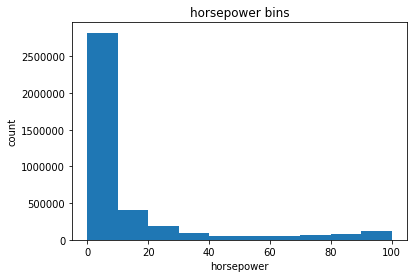

In [138]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["smartmeter_perc"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [139]:
#sm_frames16 = [df16,df_16,df_st16,df_exisgas_16,df_liandergas_16,df_stgas_16]
#sm_16=pd.concat (sm_frames16, axis=0)
#sm_16.head(1)

In [140]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_09.rename(columns={'smartmeter_perc':'df_09'}, inplace=True)
# droping all the columns except year
df_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_09.shape)
df_09.head(1)

(132655, 1)


,df_09
0,0.0


In [141]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st09.rename(columns={'smartmeter_perc':'df_st09'}, inplace=True)
# droping all the columns except year
df_st09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st09.shape)
df_st09.head(1)

(81514, 1)


,df_st09
0,0.0


In [142]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_09.rename(columns={'smartmeter_perc':'df_liandergas_09'}, inplace=True)
# droping all the columns except year
df_liandergas_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_09.shape)
df_liandergas_09.head(1)

(100839, 1)


,df_liandergas_09
0,0.0


In [143]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_09.rename(columns={'smartmeter_perc':'df_stgas_09'}, inplace=True)
# droping all the columns except year
df_stgas_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_09.shape)
df_stgas_09.head(1)

(83875, 1)


,df_stgas_09
0,0.0


In [144]:
sm0009=pd.merge(df_09, df_st09, left_index=True, right_index=True, how='left')
sm0009.shape

(132655, 2)

In [145]:
sm009=pd.merge(sm0009, df_liandergas_09, left_index=True, right_index=True, how='left')
sm009.shape

(132655, 3)

In [146]:
sm09=pd.merge(sm009, df_stgas_09, left_index=True, right_index=True, how='left')
print (sm09.shape)
sm09.head(1)

(132655, 4)


,df_09,df_st09,df_liandergas_09,df_stgas_09
0,0.0,0.0,0.0,0.0


In [147]:
#see missing data
sm09.isnull().sum()

df_09                   0
df_st09             51141
df_liandergas_09    31816
df_stgas_09         48780
dtype: int64

In [148]:
sm09=sm09.fillna(0)

In [149]:
#see missing data
sm09.isnull().sum()

df_09               0
df_st09             0
df_liandergas_09    0
df_stgas_09         0
dtype: int64

In [150]:
sm09.describe()

,df_09,df_st09,df_liandergas_09,df_stgas_09
count,132655.000000,132655.000000,132655.000000,132655.000000
mean,1.551146,2.446361,1.107694,1.834268
std,11.462026,11.060111,9.899355,9.779491
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000


In [151]:
#def myfun(a, b, c, d):
 # return [a + b + c +d]

#sm09[['sm_2009']] = sm09.apply(
#    lambda row: myfun(row.df_09, row.dfst_09, row.df_laindergas_09, row.df_stgas_09), axis=1)

In [152]:
# Adding a column comrpised of all the features through adding 
#sm09['sm_2009'] = sm09[['df_09', 'dfst_09', 'df_liandergas_09', 'df_stgas_09'].sum(axis=1)
#sm09['sm_2009'] =sm09['df_09'] + sm09['dfst_09'] + sm09['df_liandergas_09'] + sm09['df_stgas_09'] 
sm09['2009'] = sm09.sum(axis=1)

In [153]:
sm09.head(2)

,df_09,df_st09,df_liandergas_09,df_stgas_09,2009
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0


In [154]:
# Adding a column comrpised of all the features through adding 
sm09['2009'] = sm09.sum(axis=1)
# droping all the columns except year
sm09.drop(['df_09', 'df_st09', 'df_liandergas_09', 'df_stgas_09'],axis=1 , inplace=True)

In [155]:
sm09.head(1)

,2009
0,0.0


In [156]:
sm09=pd.DataFrame(sm09)

In [157]:
sm09.shape

(132655, 1)

In [158]:
#see missing data
sm09.isnull().sum()

2009    0
dtype: int64

In [159]:
sm09.describe()

,2009
count,132655.000000
mean,13.878938
std,42.305627
min,0.000000
25%,0.000000
50%,0.000000
75%,6.260000
max,418.260000


In [160]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df10.rename(columns={'smartmeter_perc':'df10'}, inplace=True)
# droping all the columns except year
df10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df10.shape)
df10.head(1)

(107512, 1)


,df10
0,0.0


In [161]:
df_10.rename(columns={'smartmeter_perc':'df_10'}, inplace=True)
# droping all the columns except year
df_10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_10.shape)
df_10.head(1)

(133554, 1)


,df_10
0,0.0


In [162]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st10.rename(columns={'smartmeter_perc':'df_st10'}, inplace=True)
# droping all the columns except year
df_st10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st10.shape)
df_st10.head(1)

(82074, 1)


,df_st10
0,0.0


In [163]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_10.rename(columns={'smartmeter_perc':'df_exisgas_10'}, inplace=True)
# droping all the columns except year
df_exisgas_10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_10.shape)
df_exisgas_10.head(1)

(82966, 1)


,df_exisgas_10
0,NaN


In [164]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_10.rename(columns={'smartmeter_perc':'df_liandergas_10'}, inplace=True)
# droping all the columns except year
df_liandergas_10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_10.shape)
df_liandergas_10.head(1)

(101398, 1)


,df_liandergas_10
0,0.0


In [165]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_10.rename(columns={'smartmeter_perc':'df_stgas_10'}, inplace=True)
# droping all the columns except year
df_stgas_10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_10.shape)
df_stgas_10.head(1)

(84225, 1)


,df_stgas_10
0,0.0


In [166]:
sm000010=pd.merge(df_10, df10, left_index=True, right_index=True, how='left')
sm000010.shape

(133554, 2)

In [167]:
sm00010=pd.merge(sm000010, df_st10, left_index=True, right_index=True, how='left')
sm00010.shape

(133554, 3)

In [168]:
sm0010=pd.merge(sm00010, df_exisgas_10, left_index=True, right_index=True, how='left')
sm0010.shape

(133554, 4)

In [169]:
sm010=pd.merge(sm0010, df_liandergas_10, left_index=True, right_index=True, how='left')
sm010.shape

(133554, 5)

In [170]:
sm10=pd.merge(sm010, df_stgas_10, left_index=True, right_index=True, how='left')
sm10.shape

(133554, 6)

In [171]:
sm10.head()

,df_10,df10,df_st10,df_exisgas_10,df_liandergas_10,df_stgas_10
0,0.0,0.0,0.0,NaN,0.0,0.0
1,0.0,0.0,0.0,NaN,0.0,0.0
2,0.0,0.0,0.0,NaN,0.0,0.0
3,0.0,0.0,0.0,NaN,0.0,0.0
4,0.0,0.0,0.0,NaN,0.0,0.0


In [172]:
# missing data
sm10.isnull().sum()

df_10                    0
df10                 26042
df_st10              51480
df_exisgas_10       133554
df_liandergas_10     32156
df_stgas_10          49329
dtype: int64

In [173]:
sm10=sm10.fillna(0)

In [174]:
# missing data
sm10.isnull().sum()

df_10               0
df10                0
df_st10             0
df_exisgas_10       0
df_liandergas_10    0
df_stgas_10         0
dtype: int64

In [175]:
# Adding a column comrpised of all the features through adding 
sm10['2010'] = sm10.sum(axis=1)

In [176]:
sm10.head(2)

,df_10,df10,df_st10,df_exisgas_10,df_liandergas_10,df_stgas_10,2010
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# droping all the columns except year
sm10.drop(['df_10','df10', 'df_st10','df_exisgas_10', 'df_liandergas_10', 'df_stgas_10'], axis=1, inplace=True)

In [178]:
sm10.head(1)

,2010
0,0.0


In [179]:
sm10.describe()

,2010
count,133554.000000
mean,7.863755
std,22.623476
min,0.000000
25%,0.000000
50%,0.000000
75%,3.850000
max,272.420000


In [180]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df11.rename(columns={'smartmeter_perc':'df11'}, inplace=True)
# droping all the columns except year
df11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df11.shape)
df11.head(1)

(108299, 1)


,df11
0,0.0


In [181]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_11.rename(columns={'smartmeter_perc':'df_11'}, inplace=True)
# droping all the columns except year
df_11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_11.shape)
df_11.head(1)

(134371, 1)


,df_11
0,0.0


In [182]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st11.rename(columns={'smartmeter_perc':'df_st11'}, inplace=True)
# droping all the columns except year
df_st11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st11.shape)
df_st11.head(1)

(82549, 1)


,df_st11
0,0.0


In [183]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_11.rename(columns={'smartmeter_perc':'df_exisgas_11'}, inplace=True)
# droping all the columns except year
df_exisgas_11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_11.shape)
df_exisgas_11.head(1)

(83518, 1)


,df_exisgas_11
0,NaN


In [184]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_11.rename(columns={'smartmeter_perc':'df_liandergas_11'}, inplace=True)
# droping all the columns except year
df_liandergas_11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_11.shape)
df_liandergas_11.head(1)

(104509, 1)


,df_liandergas_11
0,0.0


In [185]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_11.rename(columns={'smartmeter_perc':'df_stgas_11'}, inplace=True)
# droping all the columns except year
df_stgas_11.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_11.shape)
df_stgas_11.head(1)

(84533, 1)


,df_stgas_11
0,0.0


In [186]:
sm000011=pd.merge(df_11, df11, left_index=True, right_index=True, how='left')
sm000011.shape

(134371, 2)

In [187]:
sm00011=pd.merge(sm000011, df_st11, left_index=True, right_index=True, how='left')
sm00011.shape

(134371, 3)

In [188]:
sm0011=pd.merge(sm00011, df_exisgas_11, left_index=True, right_index=True, how='left')
sm0011.shape

(134371, 4)

In [189]:
sm011=pd.merge(sm0011, df_liandergas_11, left_index=True, right_index=True, how='left')
sm011.shape

(134371, 5)

In [190]:
sm11=pd.merge(sm011, df_stgas_11, left_index=True, right_index=True, how='left')
sm11.shape

(134371, 6)

In [191]:
sm11.head(2)

,df_11,df11,df_st11,df_exisgas_11,df_liandergas_11,df_stgas_11
0,0.0,0.0,0.0,NaN,0.0,0.0
1,0.0,0.0,0.0,NaN,0.0,0.0


In [192]:
# missing data
sm11.isnull().sum()

df_11                    0
df11                 26072
df_st11              51822
df_exisgas_11       134371
df_liandergas_11     29862
df_stgas_11          49838
dtype: int64

In [193]:
sm11=sm11.fillna(0)

In [194]:
# missing data
sm11.isnull().sum()

df_11               0
df11                0
df_st11             0
df_exisgas_11       0
df_liandergas_11    0
df_stgas_11         0
dtype: int64

In [195]:
# Adding a column comrpised of all the features through adding 
sm11['2011'] = sm11.sum(axis=1)
sm11.head(1)

,df_11,df11,df_st11,df_exisgas_11,df_liandergas_11,df_stgas_11,2011
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
# droping all the columns except year
sm11.drop(['df_11','df11', 'df_st11','df_exisgas_11', 'df_liandergas_11', 'df_stgas_11'], axis=1, inplace=True)
sm11.head(1)

,2011
0,0.0


In [197]:
sm11.describe()

,2011
count,134371.000000
mean,8.969351
std,23.677341
min,0.000000
25%,0.000000
50%,0.000000
75%,4.760000
max,204.760000


In [198]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df12.rename(columns={'smartmeter_perc':'df12'}, inplace=True)
# droping all the columns except year
df12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df12.shape)
df12.head(1)

(109808, 1)


,df12
0,0.0


In [199]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_12.rename(columns={'smartmeter_perc':'df_12'}, inplace=True)
# droping all the columns except year
df_12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_12.shape)
df_12.head(1)

(135181, 1)


,df_12
0,0.0


In [200]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st12.rename(columns={'smartmeter_perc':'df_st12'}, inplace=True)
# droping all the columns except year
df_st12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st12.shape)
df_st12.head(1)

(83000, 1)


,df_st12
0,0.0


In [201]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_12.rename(columns={'smartmeter_perc':'df_exisgas_12'}, inplace=True)
# droping all the columns except year
df_exisgas_12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_12.shape)
df_exisgas_12.head(1)

(91509, 1)


,df_exisgas_12
0,NaN


In [202]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_12.rename(columns={'smartmeter_perc':'df_liandergas_12'}, inplace=True)
# droping all the columns except year
df_liandergas_12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_12.shape)
df_liandergas_12.head(1)

(104936, 1)


,df_liandergas_12
0,0.0


In [203]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_12.rename(columns={'smartmeter_perc':'df_stgas_12'}, inplace=True)
# droping all the columns except year
df_stgas_12.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_12.shape)
df_stgas_12.head(1)

(84869, 1)


,df_stgas_12
0,0.0


In [204]:
sm000012=pd.merge(df_12, df12, left_index=True, right_index=True, how='left')
sm000012.shape

(135181, 2)

In [205]:
sm00012=pd.merge(sm000012, df_st12, left_index=True, right_index=True, how='left')
sm00012.shape

(135181, 3)

In [206]:
sm0012=pd.merge(sm00012, df_exisgas_12, left_index=True, right_index=True, how='left')
sm0012.shape

(135181, 4)

In [207]:
sm012=pd.merge(sm0012, df_liandergas_12, left_index=True, right_index=True, how='left')
sm012.shape

(135181, 5)

In [208]:
sm12=pd.merge(sm012, df_stgas_12, left_index=True, right_index=True, how='left')
sm12.shape

(135181, 6)

In [209]:
sm12.head(1)

,df_12,df12,df_st12,df_exisgas_12,df_liandergas_12,df_stgas_12
0,0.0,0.0,0.0,NaN,0.0,0.0


In [210]:
#missing data
sm12.isnull().sum()

df_12                    0
df12                 25373
df_st12              52181
df_exisgas_12       135181
df_liandergas_12     30245
df_stgas_12          50312
dtype: int64

In [211]:
sm12=sm12.fillna(0)
sm12.isnull().sum()

df_12               0
df12                0
df_st12             0
df_exisgas_12       0
df_liandergas_12    0
df_stgas_12         0
dtype: int64

In [212]:
# Adding a column comrpised of all the features through adding 
sm12['2012'] = sm12.sum(axis=1)

In [213]:
# droping all the columns except year
sm12.drop(['df_12','df12', 'df_st12','df_exisgas_12', 'df_liandergas_12', 'df_stgas_12'], axis=1, inplace=True)
sm12.head(1)

,2012
0,0.0


In [214]:
sm12.describe()

,2012
count,135181.000000
mean,12.508536
std,26.925219
min,0.000000
25%,0.000000
50%,0.000000
75%,8.750000
max,280.660000


In [215]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df13.rename(columns={'smartmeter_perc':'df13'}, inplace=True)
# droping all the columns except year
df13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df13.shape)
df13.head(1)

(113248, 1)


,df13
0,0.0


In [216]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_13.rename(columns={'smartmeter_perc':'df_13'}, inplace=True)
# droping all the columns except year
df_13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_13.shape)
df_13.head(1)

(136040, 1)


,df_13
0,0.0


In [217]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st13.rename(columns={'smartmeter_perc':'df_st13'}, inplace=True)
# droping all the columns except year
df_st13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st13.shape)
df_st13.head(1)

(82687, 1)


,df_st13
0,0.0


In [218]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_13.rename(columns={'smartmeter_perc':'df_exisgas_13'}, inplace=True)
# droping all the columns except year
df_exisgas_13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_13.shape)
df_exisgas_13.head(1)

(94423, 1)


,df_exisgas_13
0,NaN


In [219]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_13.rename(columns={'smartmeter_perc':'df_liandergas_13'}, inplace=True)
# droping all the columns except year
df_liandergas_13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_13.shape)
df_liandergas_13.head(1)

(105332, 1)


,df_liandergas_13
0,4.55


In [220]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_13.rename(columns={'smartmeter_perc':'df_stgas_13'}, inplace=True)
# droping all the columns except year
df_stgas_13.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_13.shape)
df_stgas_13.head(1)

(85083, 1)


,df_stgas_13
0,0.0


In [221]:
sm000013=pd.merge(df_13, df13, left_index=True, right_index=True, how='left')
sm000013.shape

(136040, 2)

In [222]:
sm00013=pd.merge(sm000013, df_st13, left_index=True, right_index=True, how='left')
sm00013.shape

(136040, 3)

In [223]:
sm0013=pd.merge(sm00013, df_exisgas_13, left_index=True, right_index=True, how='left')
sm0013.shape

(136040, 4)

In [224]:
sm013=pd.merge(sm0013, df_liandergas_13, left_index=True, right_index=True, how='left')
sm013.shape

(136040, 5)

In [225]:
sm13=pd.merge(sm013, df_stgas_13, left_index=True, right_index=True, how='left')
sm13.shape

(136040, 6)

In [226]:
sm13.head(1)

,df_13,df13,df_st13,df_exisgas_13,df_liandergas_13,df_stgas_13
0,0.0,0.0,0.0,NaN,4.55,0.0


In [227]:
# missing data
sm13.isnull().sum()

df_13                    0
df13                 22792
df_st13              53353
df_exisgas_13       136040
df_liandergas_13     30708
df_stgas_13          50957
dtype: int64

In [228]:
sm13=sm13.fillna(0)
sm13.isnull().sum()

df_13               0
df13                0
df_st13             0
df_exisgas_13       0
df_liandergas_13    0
df_stgas_13         0
dtype: int64

In [229]:
# Adding a column comrpised of all the features through adding 
sm13['2013'] = sm13.sum(axis=1)

In [230]:
# droping all the columns except year
sm13.drop(['df_13','df13', 'df_st13','df_exisgas_13', 'df_liandergas_13', 'df_stgas_13'], axis=1, inplace=True)
sm13.head(1)

,2013
0,4.55


In [231]:
sm13.describe()

,2013
count,136040.000000
mean,20.668708
std,31.199673
min,0.000000
25%,2.380000
50%,9.000000
75%,21.000000
max,297.330000


In [232]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df14.rename(columns={'smartmeter_perc':'df14'}, inplace=True)
# droping all the columns except year
df14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df14.shape)
df14.head(1)

(113644, 1)


,df14
0,0.0


In [233]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_14.rename(columns={'smartmeter_perc':'df_14'}, inplace=True)
# droping all the columns except year
df_14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_14.shape)
df_14.head(1)

(135737, 1)


,df_14
0,16.13


In [234]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st14.rename(columns={'smartmeter_perc':'df_st14'}, inplace=True)
# droping all the columns except year
df_st14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st14.shape)
df_st14.head(1)

(83004, 1)


,df_st14
0,3.03


In [235]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_14.rename(columns={'smartmeter_perc':'df_exisgas_14'}, inplace=True)
# droping all the columns except year
df_exisgas_14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_14.shape)
df_exisgas_14.head(1)

(94689, 1)


,df_exisgas_14
0,NaN


In [236]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_14.rename(columns={'smartmeter_perc':'df_liandergas_14'}, inplace=True)
# droping all the columns except year
df_liandergas_14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_14.shape)
df_liandergas_14.head(1)

(105671, 1)


,df_liandergas_14
0,18.18


In [237]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_14.rename(columns={'smartmeter_perc':'df_stgas_14'}, inplace=True)
# droping all the columns except year
df_stgas_14.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_14.shape)
df_stgas_14.head(1)

(85313, 1)


,df_stgas_14
0,6.67


In [238]:
sm000014=pd.merge(df_14, df14, left_index=True, right_index=True, how='left')
sm000014.shape

(135737, 2)

In [239]:
sm00014=pd.merge(sm000014, df_st14, left_index=True, right_index=True, how='left')
sm00014.shape

(135737, 3)

In [240]:
sm0014=pd.merge(sm00014, df_exisgas_14, left_index=True, right_index=True, how='left')
sm0014.shape

(135737, 4)

In [241]:
sm014=pd.merge(sm0014, df_liandergas_14, left_index=True, right_index=True, how='left')
sm014.shape

(135737, 5)

In [242]:
sm14=pd.merge(sm014, df_stgas_14, left_index=True, right_index=True, how='left')
sm14.shape

(135737, 6)

In [243]:
sm14.head(1)

,df_14,df14,df_st14,df_exisgas_14,df_liandergas_14,df_stgas_14
0,16.13,0.0,3.03,NaN,18.18,6.67


In [244]:
#missing data
sm14.isnull().sum()

df_14                    0
df14                 22093
df_st14              52733
df_exisgas_14       135737
df_liandergas_14     30066
df_stgas_14          50424
dtype: int64

In [245]:
sm14=sm14.fillna(0)
sm14.isnull().sum()

df_14               0
df14                0
df_st14             0
df_exisgas_14       0
df_liandergas_14    0
df_stgas_14         0
dtype: int64

In [246]:
# Adding a column comrpised of all the features through adding 
sm14['2014'] = sm14.sum(axis=1)

In [247]:
# droping all the columns except year
sm14.drop(['df_14','df14', 'df_st14','df_exisgas_14', 'df_liandergas_14', 'df_stgas_14'], axis=1, inplace=True)
sm14.head(1)

,2014
0,44.01


In [248]:
sm14.describe()

,2014
count,135737.000000
mean,33.473438
std,36.559137
min,0.000000
25%,8.820000
50%,20.760000
75%,42.640000
max,313.150000


In [249]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df15.rename(columns={'smartmeter_perc':'df15'}, inplace=True)
# droping all the columns except year
df15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df15.shape)
df15.head(1)

(113989, 1)


,df15
0,6.0


In [250]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_15.rename(columns={'smartmeter_perc':'df_15'}, inplace=True)
# droping all the columns except year
df_15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_15.shape)
df_15.head(1)

(136238, 1)


,df_15
0,18.75


In [251]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st15.rename(columns={'smartmeter_perc':'df_st15'}, inplace=True)
# droping all the columns except year
df_st15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st15.shape)
df_st15.head(1)

(83388, 1)


,df_st15
0,9.09


In [252]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_15.rename(columns={'smartmeter_perc':'df_exisgas_15'}, inplace=True)
# droping all the columns except year
df_exisgas_15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_15.shape)
df_exisgas_15.head(1)

(94945, 1)


,df_exisgas_15
0,NaN


In [253]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_15.rename(columns={'smartmeter_perc':'df_liandergas_15'}, inplace=True)
# droping all the columns except year
df_liandergas_15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_15.shape)
df_liandergas_15.head(1)

(106015, 1)


,df_liandergas_15
0,22.73


In [254]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_15.rename(columns={'smartmeter_perc':'df_stgas_15'}, inplace=True)
# droping all the columns except year
df_stgas_15.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_15.shape)
df_stgas_15.head(1)

(85573, 1)


,df_stgas_15
0,6.67


In [255]:
sm000015=pd.merge(df_15, df15, left_index=True, right_index=True, how='left')
sm000015.shape

(136238, 2)

In [256]:
sm00015=pd.merge(sm000015, df_st15, left_index=True, right_index=True, how='left')
sm00015.shape

(136238, 3)

In [257]:
sm0015=pd.merge(sm00015, df_exisgas_15, left_index=True, right_index=True, how='left')
sm0015.shape

(136238, 4)

In [258]:
sm015=pd.merge(sm0015, df_liandergas_15, left_index=True, right_index=True, how='left')
sm015.shape

(136238, 5)

In [259]:
sm15=pd.merge(sm015, df_stgas_15, left_index=True, right_index=True, how='left')
sm15.shape

(136238, 6)

In [260]:
sm15.head(1)

,df_15,df15,df_st15,df_exisgas_15,df_liandergas_15,df_stgas_15
0,18.75,6.0,9.09,NaN,22.73,6.67


In [261]:
#missing data
sm15.isnull().sum()

df_15                    0
df15                 22249
df_st15              52850
df_exisgas_15       136238
df_liandergas_15     30223
df_stgas_15          50665
dtype: int64

In [262]:
sm15=sm15.fillna(0)
sm15.isnull().sum()

df_15               0
df15                0
df_st15             0
df_exisgas_15       0
df_liandergas_15    0
df_stgas_15         0
dtype: int64

In [263]:
# Adding a column comrpised of all the features through adding 
sm15['2015'] = sm15.sum(axis=1)

In [264]:
# droping all the columns except year
sm15.drop(['df_15','df15', 'df_st15','df_exisgas_15', 'df_liandergas_15', 'df_stgas_15'], axis=1, inplace=True)
sm15.head(1)

,2015
0,63.24


In [265]:
sm15.describe()

,2015
count,136238.000000
mean,50.533951
std,45.370665
min,0.000000
25%,17.000000
50%,36.210000
75%,72.920000
max,463.840000


In [266]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df16.rename(columns={'smartmeter_perc':'df16'}, inplace=True)
# droping all the columns except year
df16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df16.shape)
df16.head(1)

(110577, 1)


,df16
0,7.0


In [267]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_16.rename(columns={'smartmeter_perc':'df_16'}, inplace=True)
# droping all the columns except year
df_16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_16.shape)
df_16.head(1)

(140639, 1)


,df_16
0,21.21


In [268]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st16.rename(columns={'smartmeter_perc':'df_st16'}, inplace=True)
# droping all the columns except year
df_st16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st16.shape)
df_st16.head(1)

(83791, 1)


,df_st16
0,9.09


In [269]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_16.rename(columns={'smartmeter_perc':'df_exisgas_16'}, inplace=True)
# droping all the columns except year
df_exisgas_16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_16.shape)
df_exisgas_16.head(1)

(84429, 1)


,df_exisgas_16
0,NaN


In [270]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_16.rename(columns={'smartmeter_perc':'df_liandergas_16'}, inplace=True)
# droping all the columns except year
df_liandergas_16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_16.shape)
df_exisgas_16.head(1)

(117250, 1)


,df_exisgas_16
0,NaN


In [271]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_16.rename(columns={'smartmeter_perc':'df_stgas_16'}, inplace=True)
# droping all the columns except year
df_stgas_16.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_16.shape)
df_stgas_16.head(1)

(85904, 1)


,df_stgas_16
0,10.0


In [272]:
sm000016=pd.merge(df_16, df16, left_index=True, right_index=True, how='left')
sm000016.shape

(140639, 2)

In [273]:
sm00016=pd.merge(sm000016, df_st16, left_index=True, right_index=True, how='left')
sm00016.shape

(140639, 3)

In [274]:
sm0016=pd.merge(sm00016, df_exisgas_16, left_index=True, right_index=True, how='left')
sm0016.shape

(140639, 4)

In [275]:
sm016=pd.merge(sm0016, df_liandergas_16, left_index=True, right_index=True, how='left')
sm016.shape

(140639, 5)

In [276]:
sm16=pd.merge(sm016, df_stgas_16, left_index=True, right_index=True, how='left')
sm16.shape

(140639, 6)

In [277]:
sm16.head(1)

,df_16,df16,df_st16,df_exisgas_16,df_liandergas_16,df_stgas_16
0,21.21,7.0,9.09,NaN,22.73,10.0


In [278]:
#missing data
sm16.isnull().sum()

df_16                    0
df16                 30062
df_st16              56848
df_exisgas_16       140639
df_liandergas_16     23389
df_stgas_16          54735
dtype: int64

In [279]:
sm16=sm16.fillna(0)
sm16.isnull().sum()

df_16               0
df16                0
df_st16             0
df_exisgas_16       0
df_liandergas_16    0
df_stgas_16         0
dtype: int64

In [280]:
# Adding a column comrpised of all the features through adding 
sm16['2016'] = sm16.sum(axis=1)

In [281]:
# droping all the columns except year
sm16.drop(['df_16','df16', 'df_st16','df_exisgas_16', 'df_liandergas_16', 'df_stgas_16'], axis=1, inplace=True)
sm16.head(1)

,2016
0,70.03


In [282]:
sm16.describe()

,2016
count,140639.000000
mean,74.005134
std,58.084634
min,0.000000
25%,27.520000
50%,59.970000
75%,110.880000
max,403.420000


In [283]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df17.rename(columns={'smartmeter_perc':'df17'}, inplace=True)
# droping all the columns except year
df17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df17.shape)
df17.head(1)

(115576, 1)


,df17
0,5.0


In [284]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_17.rename(columns={'smartmeter_perc':'df_17'}, inplace=True)
# droping all the columns except year
df_17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_17.shape)
df_17.head(1)

(141484, 1)


,df_17
0,20.59


In [285]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st17.rename(columns={'smartmeter_perc':'df_st17'}, inplace=True)
# droping all the columns except year
df_st17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st17.shape)
df_st17.head(1)

(84190, 1)


,df_st17
0,9.09


In [286]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_17.rename(columns={'smartmeter_perc':'df_exisgas_17'}, inplace=True)
# droping all the columns except year
df_exisgas_17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_17.shape)
df_exisgas_17.head(1)

(102661, 1)


,df_exisgas_17
0,NaN


In [287]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_17.rename(columns={'smartmeter_perc':'df_liandergas_17'}, inplace=True)
# droping all the columns except year
df_liandergas_17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_17.shape)
df_liandergas_17.head(1)

(117735, 1)


,df_liandergas_17
0,26.09


In [288]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_17.rename(columns={'smartmeter_perc':'df_stgas_17'}, inplace=True)
# droping all the columns except year
df_stgas_17.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_17.shape)
df_stgas_17.head(1)

(86221, 1)


,df_stgas_17
0,10.0


In [289]:
sm000017=pd.merge(df_17, df17, left_index=True, right_index=True, how='left')
sm000017.shape

(141484, 2)

In [290]:
sm00017=pd.merge(sm000017, df_st17, left_index=True, right_index=True, how='left')
sm00017.shape

(141484, 3)

In [291]:
sm0017=pd.merge(sm00017, df_exisgas_17, left_index=True, right_index=True, how='left')
sm0017.shape

(141484, 4)

In [292]:
sm017=pd.merge(sm0017, df_liandergas_17, left_index=True, right_index=True, how='left')
sm017.shape

(141484, 5)

In [293]:
sm17=pd.merge(sm017, df_stgas_17, left_index=True, right_index=True, how='left')
sm17.shape

(141484, 6)

In [294]:
sm17.head(1)

,df_17,df17,df_st17,df_exisgas_17,df_liandergas_17,df_stgas_17
0,20.59,5.0,9.09,NaN,26.09,10.0


In [295]:
#missing data
sm17.isnull().sum()

df_17                    0
df17                 25908
df_st17              57294
df_exisgas_17       141484
df_liandergas_17     23749
df_stgas_17          55263
dtype: int64

In [296]:
sm17=sm17.fillna(0)
sm17.isnull().sum()

df_17               0
df17                0
df_st17             0
df_exisgas_17       0
df_liandergas_17    0
df_stgas_17         0
dtype: int64

In [297]:
# Adding a column comrpised of all the features through adding 
sm17['2017'] = sm17.sum(axis=1)

In [298]:
# droping all the columns except year
sm17.drop(['df_17','df17', 'df_st17','df_exisgas_17', 'df_liandergas_17', 'df_stgas_17'], axis=1, inplace=True)
sm17.head(1)

,2017
0,70.77


In [299]:
sm17.describe()

,2017
count,141484.000000
mean,119.438859
std,80.107531
min,0.000000
25%,52.840000
50%,112.935000
75%,174.240000
max,490.910000


In [300]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df18.rename(columns={'smartmeter_perc':'df18'}, inplace=True)
# droping all the columns except year
df18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df18.shape)
df18.head(1)

(124163, 1)


,df18
0,7.14


In [301]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_18.rename(columns={'smartmeter_perc':'df_18'}, inplace=True)
# droping all the columns except year
df_18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_18.shape)
df_18.head(1)

(142265, 1)


,df_18
0,22.86


In [302]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st18.rename(columns={'smartmeter_perc':'df_st18'}, inplace=True)
# droping all the columns except year
df_st18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st18.shape)
df_st18.head(1)

(84695, 1)


,df_st18
0,21.21


In [303]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_exisgas_18.rename(columns={'smartmeter_perc':'df_exisgas_18'}, inplace=True)
# droping all the columns except year
df_exisgas_18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_exisgas_18.shape)
df_exisgas_18.head(1)

(110407, 1)


,df_exisgas_18
0,NaN


In [304]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_18.rename(columns={'smartmeter_perc':'df_liandergas_18'}, inplace=True)
# droping all the columns except year
df_liandergas_18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_18.shape)
df_liandergas_18.head(1)

(118199, 1)


,df_liandergas_18
0,29.17


In [305]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_18.rename(columns={'smartmeter_perc':'df_stgas_18'}, inplace=True)
# droping all the columns except year
df_stgas_18.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'delivery_perc', \
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_18.shape)
df_stgas_18.head(1)

(85841, 1)


,df_stgas_18
0,14.81


In [306]:
sm000018=pd.merge(df_18, df18, left_index=True, right_index=True, how='left')
sm000018.shape

(142265, 2)

In [307]:
sm00018=pd.merge(sm000018, df_st18, left_index=True, right_index=True, how='left')
sm00018.shape

(142265, 3)

In [308]:
sm0018=pd.merge(sm00018, df_exisgas_18, left_index=True, right_index=True, how='left')
sm0018.shape

(142265, 4)

In [309]:
sm018=pd.merge(sm0018, df_liandergas_18, left_index=True, right_index=True, how='left')
sm018.shape

(142265, 5)

In [310]:
sm18=pd.merge(sm018, df_stgas_18, left_index=True, right_index=True, how='left')
sm18.shape

(142265, 6)

In [311]:
sm18.head(1)

,df_18,df18,df_st18,df_exisgas_18,df_liandergas_18,df_stgas_18
0,22.86,7.14,21.21,NaN,29.17,14.81


In [312]:
#missing data
sm18.isnull().sum()

df_18                    0
df18                 18102
df_st18              57570
df_exisgas_18       142265
df_liandergas_18     24066
df_stgas_18          56424
dtype: int64

In [313]:
sm18=sm18.fillna(0)
sm18.isnull().sum()

df_18               0
df18                0
df_st18             0
df_exisgas_18       0
df_liandergas_18    0
df_stgas_18         0
dtype: int64

In [314]:
# Adding a column comrpised of all the features through adding 
sm18['2018'] = sm18.sum(axis=1)

In [315]:
# droping all the columns except year
sm18.drop(['df_18','df18', 'df_st18','df_exisgas_18', 'df_liandergas_18', 'df_stgas_18'], axis=1, inplace=True)
sm18.head(1)

,2018
0,95.19


In [316]:
sm18.describe()

,2018
count,142265.000000
mean,171.045352
std,93.067127
min,0.000000
25%,100.000000
50%,172.890000
75%,239.120000
max,482.620000


In [317]:
sm09.shape

(132655, 1)

In [318]:
sm10.shape

(133554, 1)

In [319]:
sm_09=pd.merge(sm09, sm10, left_index=True, right_index=True, how='right')
sm_09.shape

(133554, 2)

In [320]:
sm11.shape

(134371, 1)

In [321]:
sm_10=pd.merge(sm_09, sm11, left_index=True, right_index=True, how='right')
sm_10.shape

(134371, 3)

In [322]:
sm12.shape

(135181, 1)

In [323]:
sm_11=pd.merge(sm_10, sm12, left_index=True, right_index=True, how='right')
sm_11.shape

(135181, 4)

In [324]:
sm13.shape

(136040, 1)

In [325]:
sm_12=pd.merge(sm_11, sm13, left_index=True, right_index=True, how='right')
sm_12.shape

(136040, 5)

In [326]:
sm14.shape

(135737, 1)

In [327]:
sm_13=pd.merge(sm_12, sm14, left_index=True, right_index=True, how='left')
sm_13.shape

(136040, 6)

In [328]:
sm15.shape

(136238, 1)

In [329]:
sm_14=pd.merge(sm_13, sm15, left_index=True, right_index=True, how='right')
sm_14.shape

(136238, 7)

In [330]:
sm16.shape

(140639, 1)

In [331]:
sm_15=pd.merge(sm_14, sm16, left_index=True, right_index=True, how='right')
sm_15.shape

(140639, 8)

In [332]:
sm17.shape

(141484, 1)

In [333]:
sm_16=pd.merge(sm_15, sm17, left_index=True, right_index=True, how='right')
sm_16.shape

(141484, 9)

In [334]:
sm18.shape

(142265, 1)

In [335]:
sm_17=pd.merge(sm_16, sm18, left_index=True, right_index=True, how='right')
sm_17.shape

(142265, 10)

In [336]:
sm_17.head(1)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,0.0,4.55,44.01,63.24,70.03,70.77,95.19


In [337]:
sm_17.dtypes

2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

In [338]:
smart_meter=sm_17
smart_meter.head(1)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,0.0,4.55,44.01,63.24,70.03,70.77,95.19


In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
df_tot=smart_meter.sum(axis=0)

In [341]:
df_tot.shape

(10,)

In [342]:
df_tot.head(10)

2009    1.841110e+06
2010    1.050236e+06
2011    1.205221e+06
2012    1.690916e+06
2013    2.811771e+06
2014    4.543584e+06
2015    6.884644e+06
2016    1.040801e+07
2017    1.689869e+07
2018    2.433377e+07
dtype: float64

In [343]:
#df_tot=pd.DataFrame(df_tot).reset_index()

In [344]:
#df_tot.columns = ['Year', 'Total']

In [345]:
#df_tot.head()

In [346]:
#df_tot['Year'] = df_tot.Year.apply(lambda x: x.strip ('sm_'))

In [347]:
#df_tot[['Year']]=df_tot[['Year']].astype('float')

In [348]:
#df_tot.dtypes

In [349]:
#df_tot.set_index('Year', inplace=True)

In [350]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(smart_meter.sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,2009,1.841110e+06
1,2010,1.050236e+06
2,2011,1.205221e+06
3,2012,1.690916e+06
4,2013,2.811771e+06


In [351]:
df_tot.head(1)

,year,total
0,2009,1841110.46


In [352]:
smart_meter.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.0,0.0,0.0,0.0,4.55,44.01,63.24,70.03,70.77,95.19
1,0.0,0.0,0.0,0.0,0.00,24.72,44.74,69.93,70.82,84.36
2,0.0,0.0,0.0,0.0,10.44,14.81,14.81,38.40,55.10,69.01
3,0.0,0.0,0.0,5.0,5.00,48.89,53.59,74.26,88.15,91.25
4,0.0,0.0,0.0,0.0,0.00,75.00,86.57,118.03,145.51,140.68


### Now we are ready to visualize the spreading of Smart Meters over the years through histogram, bar chart and scatter plot

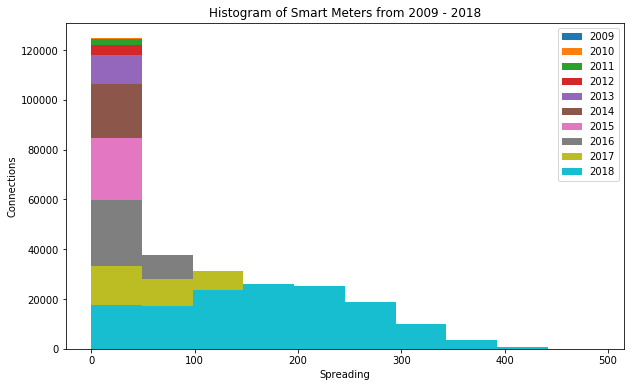

In [353]:
# generate histogram
smart_meter.plot(kind='hist',  figsize=(10, 6))

plt.title('Histogram of Smart Meters from 2009 - 2018')
plt.ylabel('Connections')
plt.xlabel('Spreading')

plt.show()

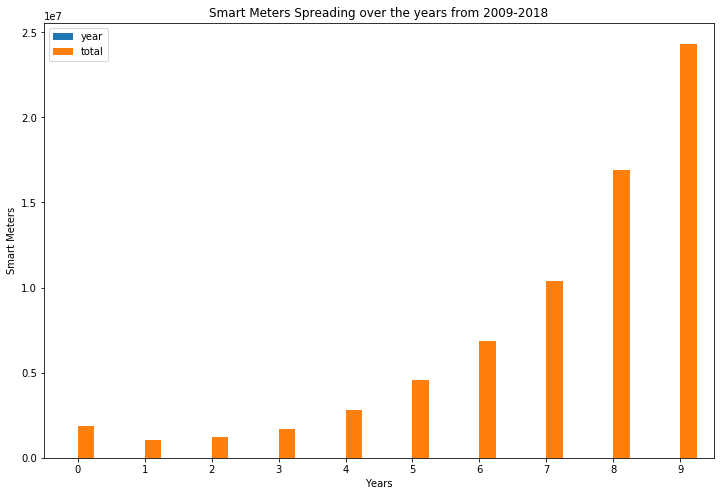

In [354]:
import matplotlib.pyplot as plt
#a.index = a.index.map(int) # let's change the index values of Haiti to type integer for plotting
#plt.plot=(Years,Total)
df_tot.plot(kind='bar',figsize=(12,8))

plt.title('Smart Meters Spreading over the years from 2009-2018')
plt.ylabel('Smart Meters')
plt.xlabel('Years')
#plt.text(8.1,2.45e7, '2018 Reading') # Note
plt.xticks(rotation=360)
plt.show() # need this line to show the updates made to the figure

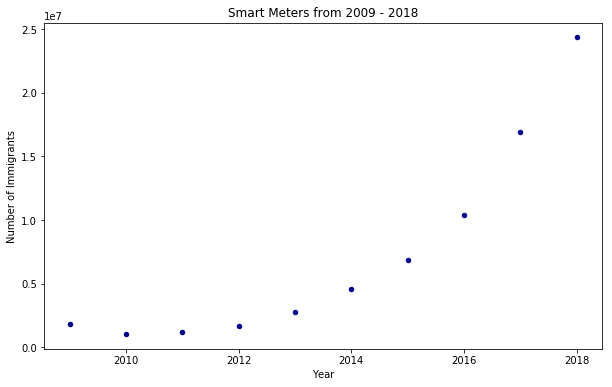

In [355]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Smart Meters from 2009 - 2018')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

### We can say that over the ten years, the  smart meters are very common today. The digital revolution has replaced the conventional meters.  

## What is the trend of home-produced energy? (solar panel)

### We have to do the same as we did for smart meters. Then through line graph we can easily visualize the trend

In [356]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_09 = pd.read_csv(body)
df_09.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15,100.0,66.67,47,3x25,12958,46.67,0.0


In [357]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_09.rename(columns={'delivery_perc':'df_09'}, inplace=True)
# droping all the columns except year
df_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'smartmeter_perc',\
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_09.shape)
df_09.head(1)

(132655, 1)


,df_09
0,100.0


In [358]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_st09 = pd.read_csv(body)
df_st09.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0


In [359]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_st09.rename(columns={'delivery_perc':'df_st09'}, inplace=True)
# droping all the columns except year
df_st09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'smartmeter_perc',\
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_st09.shape)
df_st09.head(1)

(81514, 1)


,df_st09
0,100.0


In [360]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='liander_electricity_01012009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_liandergas_09 = pd.read_csv(body)
df_liandergas_09.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Liander N.V. (NW),Liander NW,Rijksweg A44,1000AA,1011AA,NIEUW VENNEP,15,100.0,66.67,47,3x25,12958,46.67,0.0


In [361]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_liandergas_09.rename(columns={'delivery_perc':'df_liandergas_09'}, inplace=True)
# droping all the columns except year
df_liandergas_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'smartmeter_perc',\
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_liandergas_09.shape)
df_liandergas_09.head(1)

(132655, 1)


,df_liandergas_09
0,100.0


In [362]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='stedin_electricity_2009.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_stgas_09 = pd.read_csv(body)
df_stgas_09.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,32,100.0,93.75,78,3x25,5948,81.25,0.0


In [363]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df_stgas_09.rename(columns={'delivery_perc':'df_stgas_09'}, inplace=True)
# droping all the columns except year
df_stgas_09.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'smartmeter_perc',\
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_stgas_09.shape)
df_stgas_09.head(1)

(81514, 1)


,df_stgas_09
0,100.0


In [364]:
sm0009=pd.merge(df_09, df_st09, left_index=True, right_index=True, how='left')
sm0009.shape
sm009=pd.merge(sm0009, df_liandergas_09, left_index=True, right_index=True, how='left')
sm009.shape
sm09=pd.merge(sm009, df_stgas_09, left_index=True, right_index=True, how='left')
print (sm09.shape)
sm09.head(1)

(132655, 4)


,df_09,df_st09,df_liandergas_09,df_stgas_09
0,100.0,100.0,100.0,100.0


In [365]:
#missingdata
sm09.isnull().sum()

df_09                   0
df_st09             51141
df_liandergas_09        0
df_stgas_09         51141
dtype: int64

In [366]:
sm09=sm09.fillna(0)
sm09.isnull().sum()

df_09               0
df_st09             0
df_liandergas_09    0
df_stgas_09         0
dtype: int64

In [367]:
# Adding a column comrpised of all the features through adding 
sm09['2009'] = sm09.sum(axis=1)
# droping all the columns except year
sm09.drop(['df_09', 'df_st09', 'df_liandergas_09', 'df_stgas_09'],axis=1 , inplace=True)
sm09.head(1)

,2009
0,400.0


In [368]:
sm09.describe()

,2009
count,132655.000000
mean,322.068933
std,96.986159
min,100.000000
25%,200.000000
50%,400.000000
75%,400.000000
max,400.000000


In [369]:
body = client_d677618706764068bebe9e144db03560.get_object(Bucket='advanceddatascience-donotdelete-pr-wi2dpsm1nwyabr',Key='enexis_electricity_01012010.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df10 = pd.read_csv(body)
df10.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,NaN,NaN,4282,25,0.0


In [370]:
# renaming smartmeter_perc in to years so that we can vsualize the spreading aganist each year
df10.rename(columns={'delivery_perc':'df10'}, inplace=True)
# droping all the columns except year
df10.drop (['net_manager','purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'num_connections', 'smartmeter_perc',\
             'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', \
             'annual_consume_lowtarif_perc'],  axis=1, inplace=True)

print (df_10.shape)
df_10.head(1)

(133554, 1)


,df_10
0,0.0
